<a href="https://colab.research.google.com/github/ROHITHREDDY1222/AIML_2303A52140/blob/main/AIML_labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

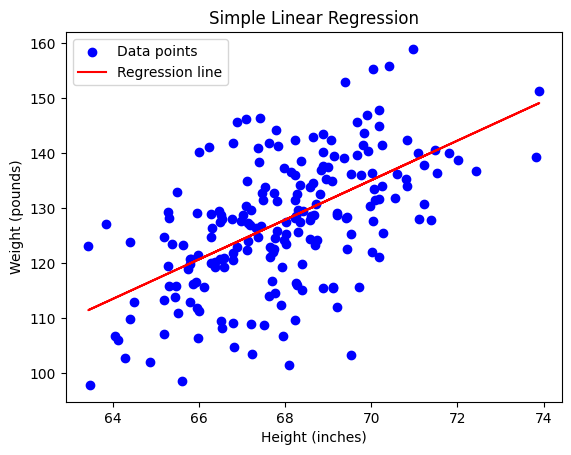

R-squared: 0.15
R-squared (Multiple Regression): 0.14


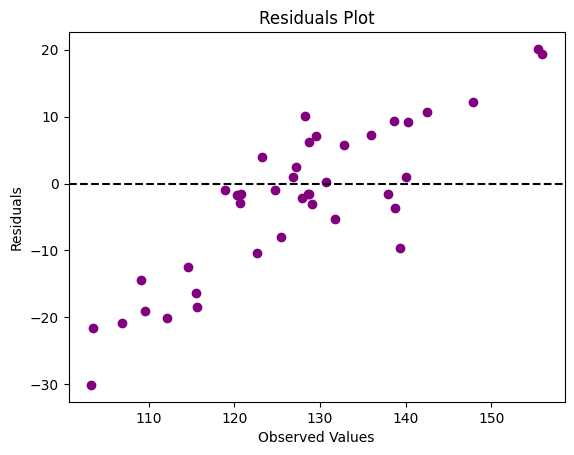

R-squared (with scaling): 0.15


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/hw_200.csv')

# Rename columns for convenience
data.columns = ["Index", "Height", "Weight"]

# 1. Simple Linear Regression
X = data[["Height"]]
y = data["Weight"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Plot regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, lr.predict(X), color='red', label='Regression line')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# 2. Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# 3. Multiple Linear Regression
# Adding a synthetic feature for demonstration
data["Height_squared"] = data["Height"] ** 2
X_multi = data[["Height", "Height_squared"]]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

# Predictions and comparison
y_pred_multi = lr_multi.predict(X_test_m)
r2_multi = r2_score(y_test_m, y_pred_multi)
print(f"R-squared (Multiple Regression): {r2_multi:.2f}")

# 4. Residuals plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Observed Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

# 5. Feature scaling comparison
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_s, y_train_s)
y_pred_s = lr_scaled.predict(X_test_s)
r2_scaled = r2_score(y_test_s, y_pred_s)
print(f"R-squared (with scaling): {r2_scaled:.2f}")